# take centered connectivity matrices and compute gradients
baseline as reference

In [19]:
import pandas as pd

from brainspace.gradient import GradientMaps
# this is computed based on `baseline`
ref_cmat = pd.read_csv('data/cmat/ref_mean.csv').to_numpy()

gref = GradientMaps(random_state=42, approach='pca', kernel='cosine')
# kernel needed for centered mats
gref.fit(ref_cmat)

DIR = '/Users/qasem/PycharmProjects/cortical-400-subcortical-RL-task-rest/'
subjects = pd.read_csv(DIR + '_participants.tsv', sep='\t')
subjects = subjects.loc[subjects.exclude == 0, 'participant_id'].tolist()
subjects.remove(37)  # no data available
subjects.remove(25)  # no data available
subjects.remove(36)  # no data available
# print(subjects)

for each gradient, take shift that happens from baseline to early, and from early to late. add it to epochs

In [20]:
def cmat_cnt(subject, epoch):
    return pd.read_csv('data/cmat/cnt/cnt_'+str(subject)+'_'+epoch+'.csv').to_numpy()

In [21]:
# make and save gradients

# EPOCHS = ['baseline', 'early', 'late']
# EPOCH_REF = 'baseline'

# g = GradientMaps(random_state=42, approach='pca', alignment='procrustes', kernel='cosine')
# g.fit([cmat_cnt(s, e) for e in  EPOCHS for s in subjects],
#       reference=gref.gradients_)
#
# assert len(subjects) * len(EPOCHS) == len(g.aligned_)


# print(np.stack(g.aligned_).shape)
#
# regions_nets = pd.read_csv('data/regions_sorted.csv')
#
# dfg = []
# for e in EPOCHS:
#     for s in subjects:
#         subj_epoch_dict = {'subject': s, 'epoch': e, 'region': regions_nets['region'],
#                            '7net': regions_nets['7net'], '17net': regions_nets['17net']}
#         for n in range(1,10):     # take top 9 gradients. 10th comes before 2 when sorted as string.
#             subj_epoch_dict['g'+str(n)] = g.aligned_[EPOCHS.index(e) * len(subjects) + subjects.index(s)][:, n-1]
#         dfg.append(pd.DataFrame(subj_epoch_dict))
#
# dfg = pd.concat(dfg, axis=0).reset_index(drop=True)
# dfg.to_csv('data/gradient_10.csv', index=False)

In [22]:
# load gradients, only first 3 columns

dfg = pd.read_csv('data/gradient_10.csv',
                  usecols=['subject', 'region', '7net', '17net', 'epoch',
                           'g1', 'g2', 'g3'])

dfg = dfg.pivot_table(index=['subject', 'region', '7net', '17net'], columns='epoch')

def add_contrasts(df):
    df = df.droplevel(0, axis=1)
    df['b2e'] = df['early'] - df['baseline']
    df['e2l'] = df['late'] - df['early']
    return df

dfg = dfg.groupby(level=0, axis=1).apply(add_contrasts)
dfg.columns.names = ['g', 'epoch']

this contains PC loadings for each subject, region, and epoch (phases of learning; baseline, early, late, and their contrasts)

In [23]:
dfg.head()

g                                                         g1            \
epoch                                                    b2e  baseline   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB -1.073136 -1.202219   
        7Networks_LH_Cont_Cing_2 Cont ContC         0.805691  0.132472   
        7Networks_LH_Cont_Cing_3 Cont ContC         0.915711 -0.087299   
        7Networks_LH_Cont_Cing_4 Cont ContA        -1.690321 -0.275912   
        7Networks_LH_Cont_Cing_5 Cont ContC         0.194787 -1.144249   

g                                                                       \
epoch                                                    e2l     early   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB  0.668598 -2.275355   
        7Networks_LH_Cont_Cing_2 Cont ContC         0.070708  0.938163   
        7Networks_LH_Cont_Cing_3 Cont ContC        -0.275651  0.828413   
        7Networks_LH_Cont_Cing_4 Cont ContA         1.202722 -1.966233   
        7Networks_LH_Cont_Cing_5 Cont ContC         1.652235 -0.949462   

g                                                                   g2  \
epoch                                                   late       b2e   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB -1.606757  0.582656   
        7Networks_LH_Cont_Cing_2 Cont ContC         1.008871  0.607136   
        7Networks_LH_Cont_Cing_3 Cont ContC         0.552762  0.423712   
        7Networks_LH_Cont_Cing_4 Cont ContA        -0.763511 -1.150298   
        7Networks_LH_Cont_Cing_5 Cont ContC         0.702773 -1.113543   

g                                                                       \
epoch                                               baseline       e2l   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB -0.087578 -1.385043   
        7Networks_LH_Cont_Cing_2 Cont ContC        -2.357872  0.519335   
        7Networks_LH_Cont_Cing_3 Cont ContC        -2.294425  0.156920   
        7Networks_LH_Cont_Cing_4 Cont ContA         0.491095  1.235301   
        7Networks_LH_Cont_Cing_5 Cont ContC        -0.551032 -0.251611   

g                                                                       \
epoch                                                  early      late   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB  0.495079 -0.889964   
        7Networks_LH_Cont_Cing_2 Cont ContC        -1.750736 -1.231401   
        7Networks_LH_Cont_Cing_3 Cont ContC        -1.870713 -1.713793   
        7Networks_LH_Cont_Cing_4 Cont ContA        -0.659202  0.576098   
        7Networks_LH_Cont_Cing_5 Cont ContC        -1.664575 -1.916185   

g                                                         g3            \
epoch                                                    b2e  baseline   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB  0.097862 -0.634879   
        7Networks_LH_Cont_Cing_2 Cont ContC        -1.395094 -0.347894   
        7Networks_LH_Cont_Cing_3 Cont ContC        -1.295050 -0.423588   
        7Networks_LH_Cont_Cing_4 Cont ContA         0.549417 -0.621618   
        7Networks_LH_Cont_Cing_5 Cont ContC         0.569075 -1.031160   

g                                                                       \
epoch                                                    e2l     early   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB  0.016636 -0.537017   
        7Networks_LH_Cont_Cing_2 Cont ContC         1.944512 -1.742987   
        7Networks_LH_Cont_Cing_3 Cont ContC         2.777589 -1.718638  

In [24]:
print(dfg.index.names, dfg.columns.names)

['subject', 'region', '7net', '17net'] ['g', 'epoch']


the following seems to be noise. look at the difference between mean and std for each gradient.

In [25]:
import seaborn
import matplotlib.pyplot as plt

seaborn.set_theme(style='whitegrid')
seaborn.set_style('white')
seaborn.set_context('paper', font_scale=1.5)

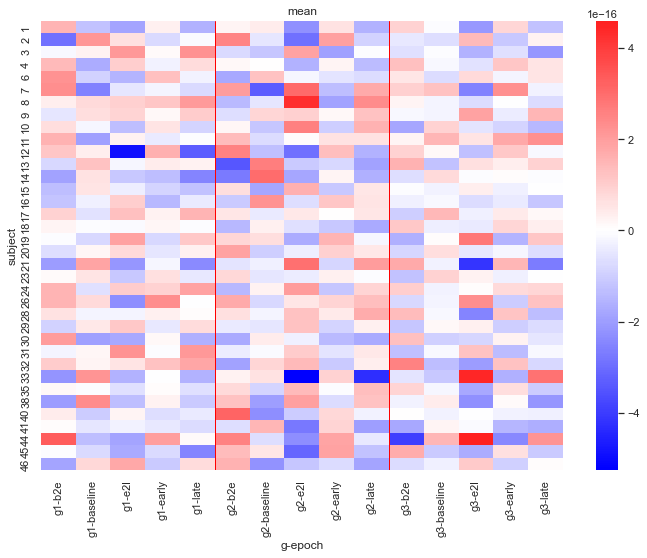

In [26]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
ax = seaborn.heatmap(dfg.groupby('subject').mean(),
                cmap='bwr', center=0)
ax.set_title("mean")
for i in range(1, 10):  ax.axvline(i * 5, color='red', linewidth=1)

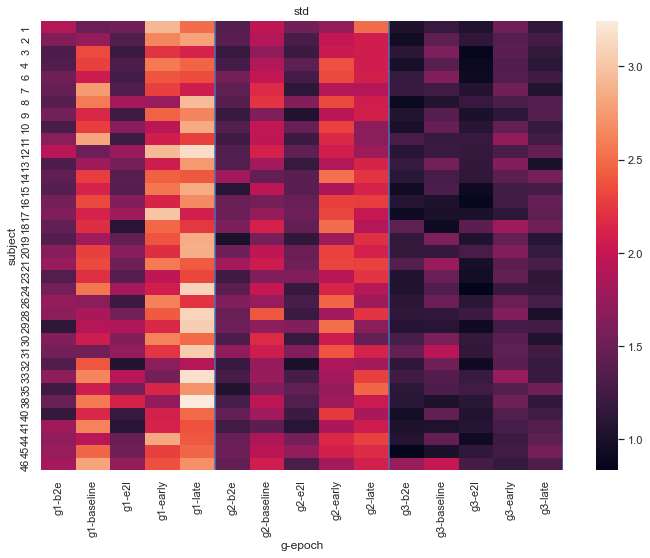

In [27]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
ax = seaborn.heatmap(dfg.groupby('subject').std())
ax.set_title('std')
for i in range(1, 10):  ax.axvline(i * 5)

# any correlation with behavioral task scores?
just to clarify, we had 2 task scores for each subject:
RLScore is the score with fPCA (described in methods), and tscore is the score is simply an unpaired t-test between the late and early learning phases, ie how much they improved throughout learning.

In [28]:
# load learning scores
metrics = pd.read_csv('data/metrics.csv', index_col=3)
metrics

,Subject,tscore,RLScore
subject,,,
1,AB1,-8.686500,-1.179789
2,AG1,-6.485268,1.104018
3,AH1,-2.347640,-0.302101
4,AM1,-6.676496,-1.400917
6,AP1,-16.480796,0.868475
7,AV1,-3.902501,0.859943
8,BN1,-6.263557,1.433999
9,CD1,-10.370127,-0.661215
10,CG1,-4.442353,-0.337563


In [29]:
print(metrics.corrwith(metrics['RLScore']))

tscore     0.261855
RLScore    1.000000
dtype: float64


In [30]:
from scipy.stats import pearsonr
def pval(x, y): return pearsonr(x, y)[1]

take mean, median, and std of each gradient/epoch, and see if there is any significance with task scores.

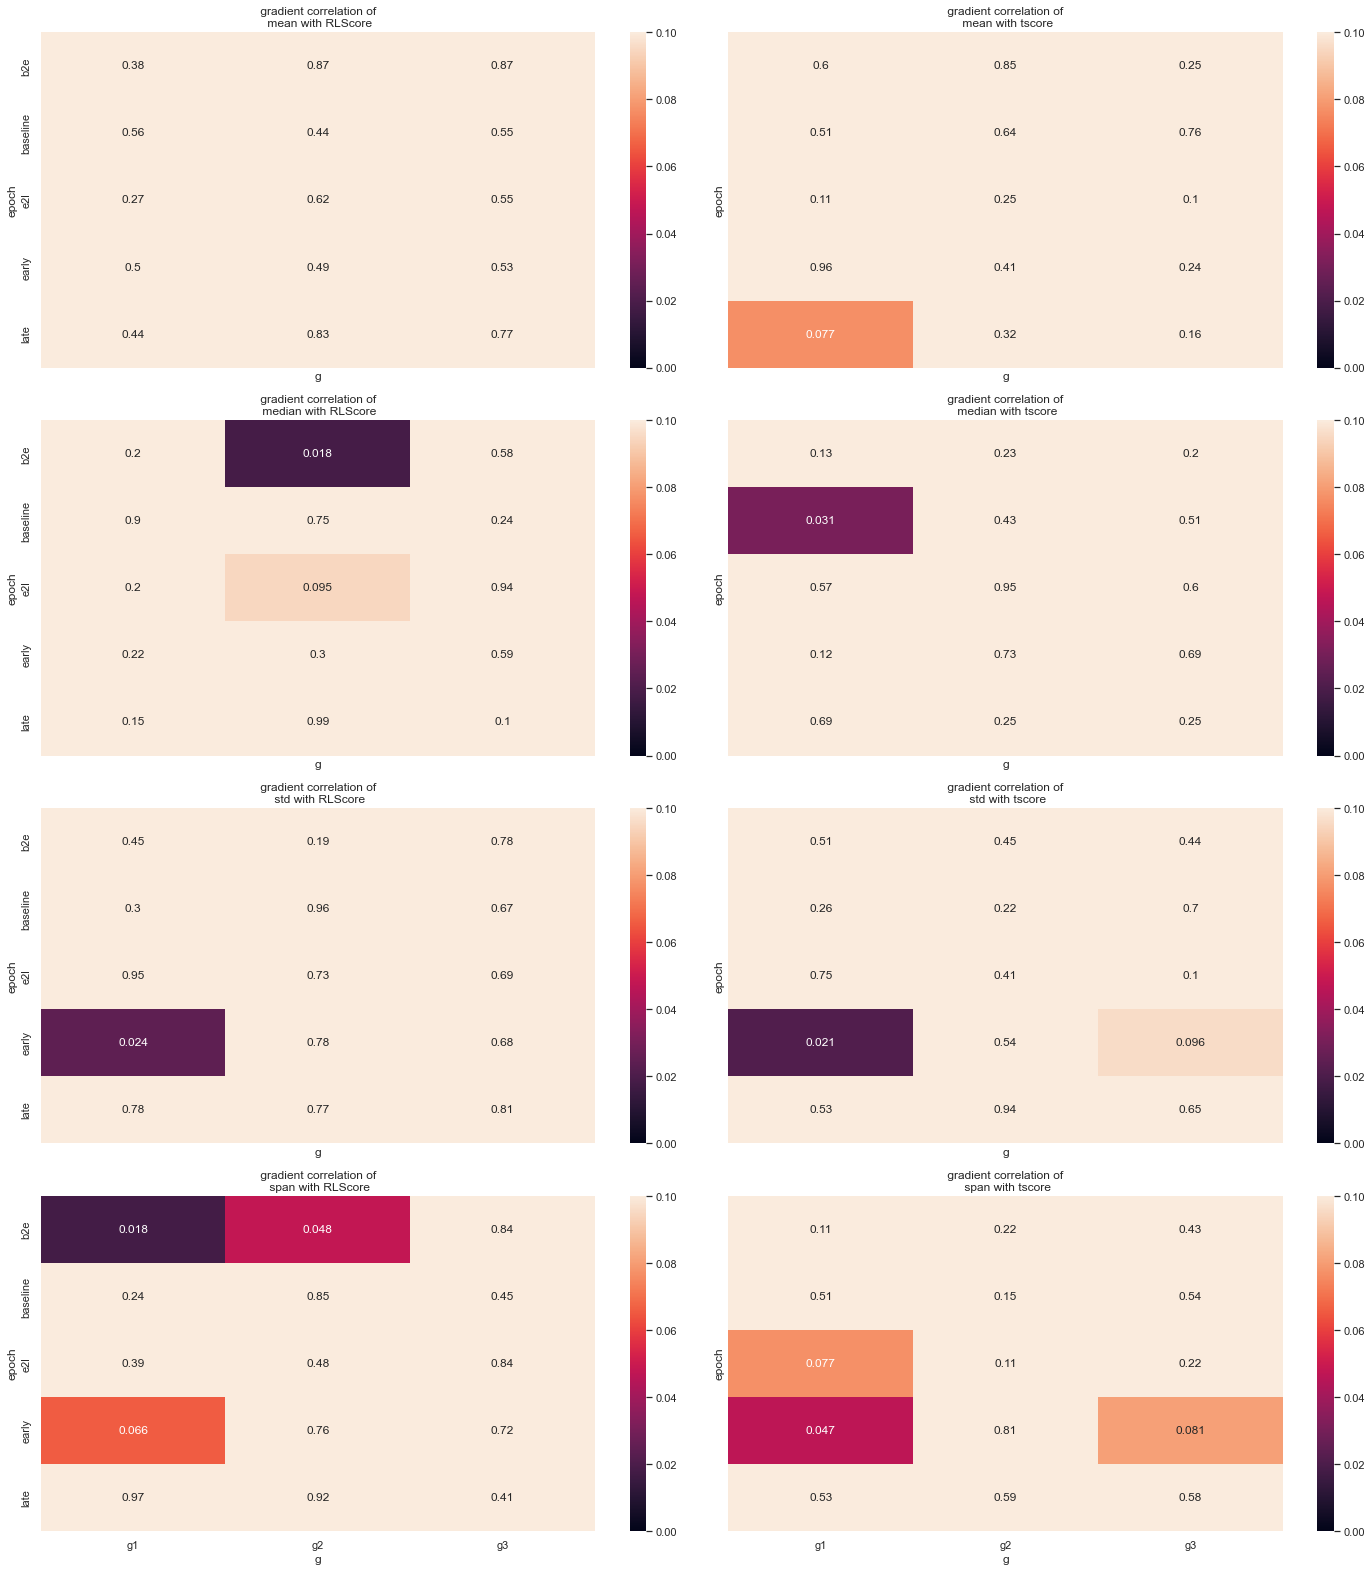

In [31]:
span = lambda x: x.max() - x.min()

fig, axes = plt.subplots(4,2, figsize=(20, 22), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    agg_func = 'mean' if i < 2 else 'median' if i < 4 else 'std' if i < 6 else span
    agg_str = agg_func if agg_func != span else 'span'
    metric = 'RLScore' if i%2 == 0 else 'tscore'

    pval_score = dfg.groupby(level='subject').apply(agg_func).corrwith(metrics[metric], method=pval)
    seaborn.heatmap(pval_score.unstack('g'), annot=True, vmin=0, vmax=.1, ax=ax)
    ax.set_title(f' gradient correlation of \n {agg_str} with {metric}')

plt.tight_layout()
# plt.savefig('g-pvalue.png')
plt.show()

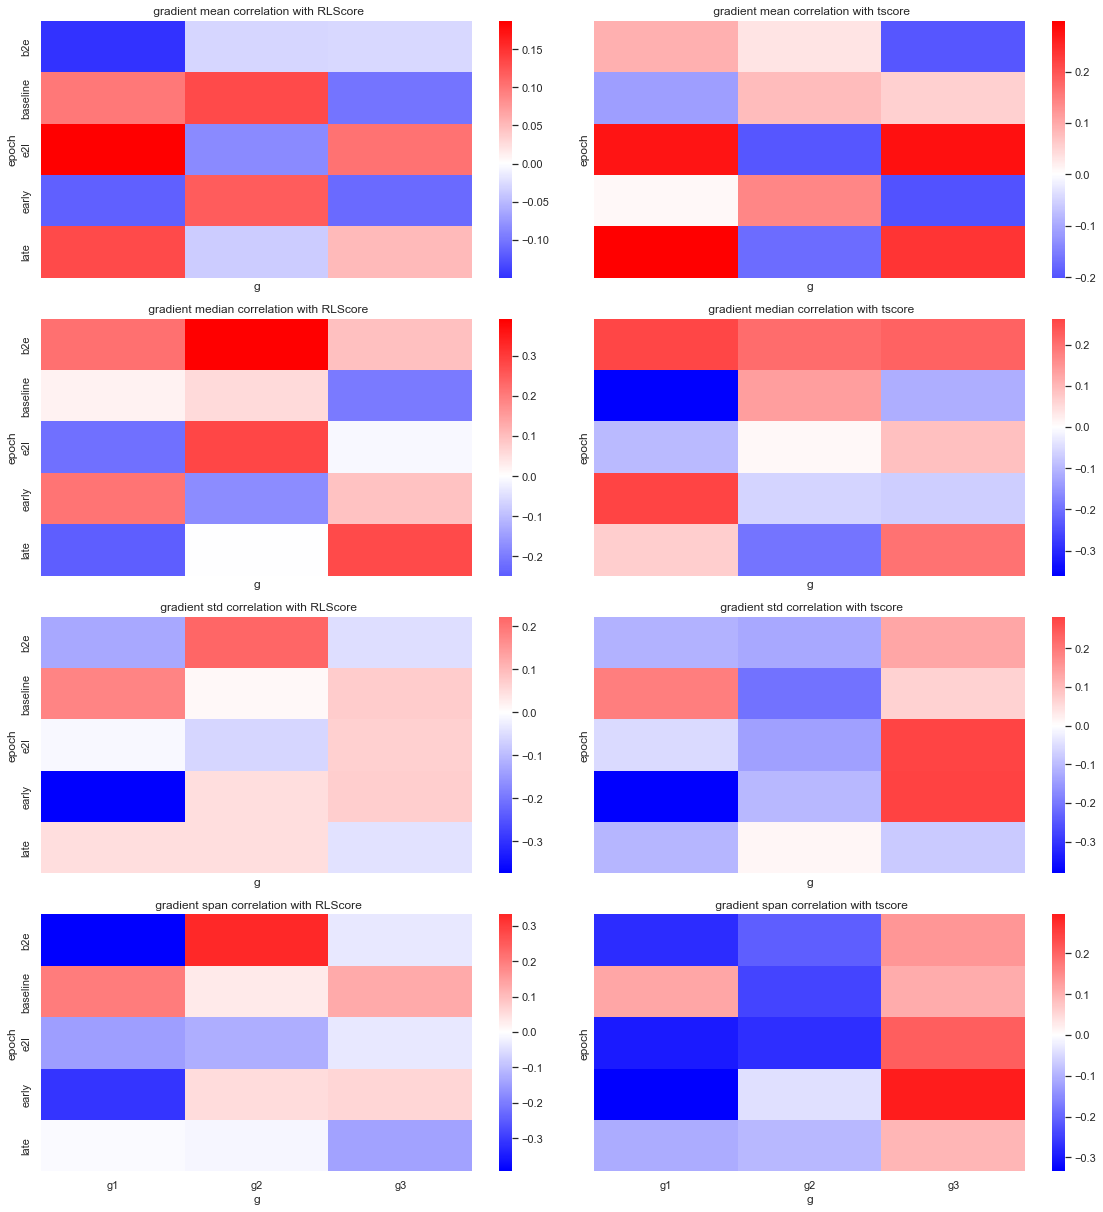

In [32]:
fig, axes = plt.subplots(4,2, figsize=(16, 17), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    agg_func = 'mean' if i < 2 else 'median' if i < 4 else 'std' if i < 6 else span
    agg_str = agg_func if agg_func != span else 'span'
    metric = 'RLScore' if i%2 == 0 else 'tscore'

    corr_score = dfg.groupby(level='subject').apply(agg_func).corrwith(metrics[metric])
    seaborn.heatmap(corr_score.unstack('g'), ax=ax, cmap='bwr', center=0)
    ax.set_title(f' gradient {agg_str} correlation with {metric}')

plt.tight_layout()
plt.show()
# fig.savefig('g-corr.png', dpi=300)

# static 3D plot in top 3 gradients and color with task score
none significant as shown above.

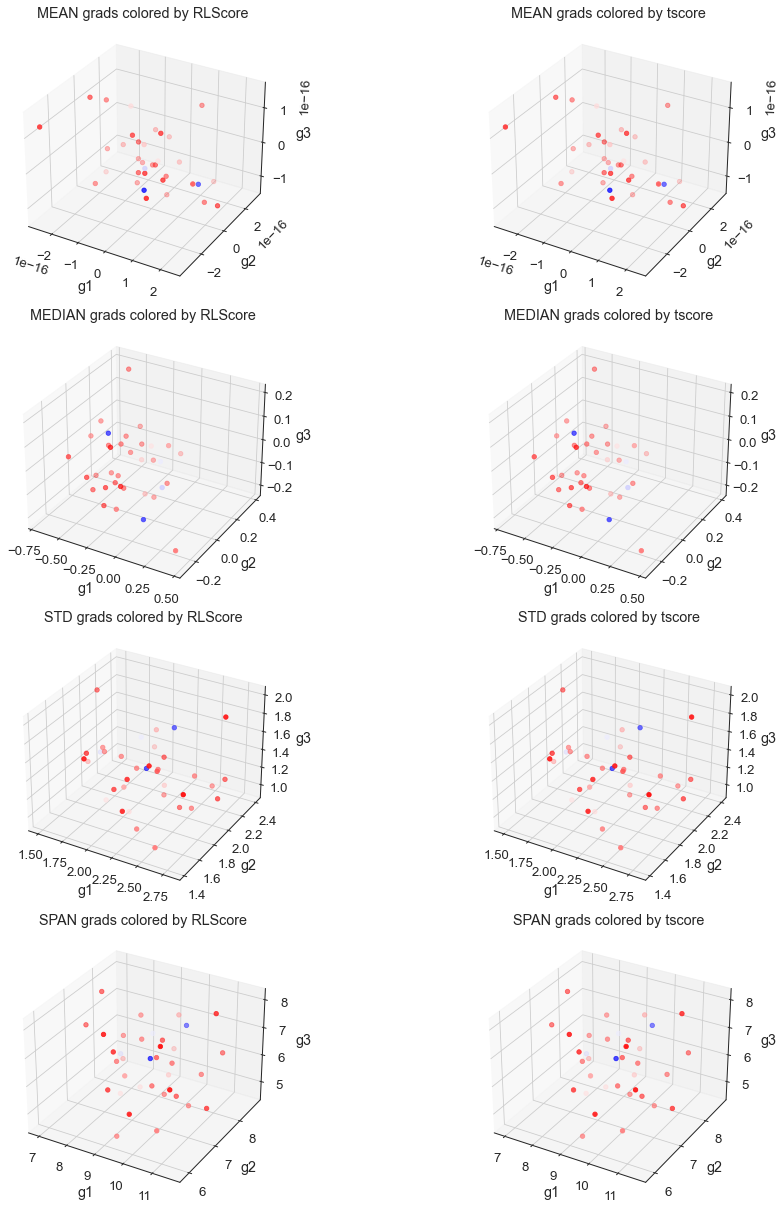

In [33]:
epoch = 'baseline'

seaborn.set_theme(style='whitegrid')
seaborn.set_style('white')
seaborn.set_context('paper', font_scale=1.5)

fig, axes = plt.subplots(4,2, figsize=(16, 17), subplot_kw={'projection': '3d'})

for i, ax in enumerate(axes.flatten()):
    agg_func = 'mean' if i < 2 else 'median' if i < 4 else 'std' if i < 6 else span
    agg_str = agg_func if agg_func != span else 'span'
    metric = 'RLScore' if i%2 == 0 else 'tscore'

    data = dfg.groupby(level='subject').apply(agg_func).xs(epoch, axis=1, level='epoch').join(metrics)

    ax.scatter(data['g1'], data['g2'], data['g3'], c=data['tscore'], cmap='bwr')
    ax.set_xlabel('g1')
    ax.set_ylabel('g2')
    ax.set_zlabel('g3')

    ax.set_title(agg_str.upper() + ' grads colored by ' + metric)

plt.tight_layout()
plt.show()

# multiple regression and get weights for each gradient

In [63]:
from statsmodels.formula.api import ols
model = ols('RLScore ~ g1 + g2 + g3', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RLScore   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.8123
Date:                Tue, 28 Mar 2023   Prob (F-statistic):              0.496
Time:                        12:28:15   Log-Likelihood:                -49.254
No. Observations:                  36   AIC:                             106.5
Df Residuals:                      32   BIC:                             112.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5668      2.779     -1.283      0.209      -9.228       2.094
g1             0.2199      0.161      1.363      0.182      -0.109       0.549
g2             0.0375      0.260      0.145      0.886      -0.491       0.566
g3             0.1907      0.195      0.980      0.334      -0.206       0.587
==============================================================================
Omnibus:                        2.909   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                1.421
Skew:                           0.003   Prob(JB):                        0.492
Kurtosis:                       2.027   Cond. No.                         225.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

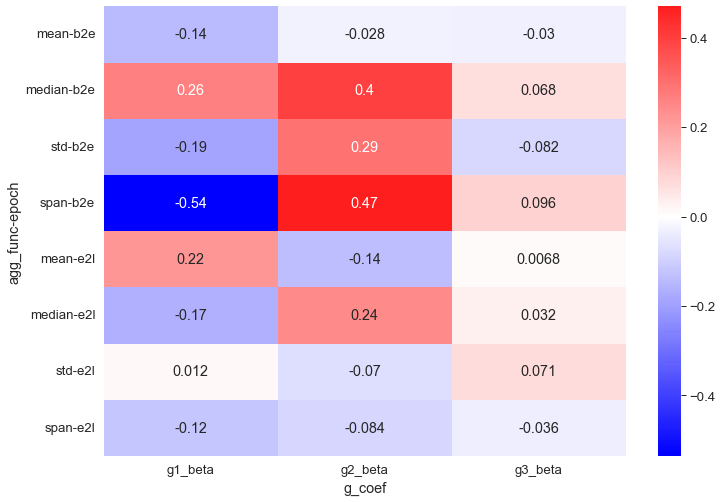

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

metric = 'RLScore'

def mult_coefs(df):
    mult_reg_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
    mult_reg_model.fit(df[['g1', 'g2', 'g3']], df[metric])
    mult_reg_model = mult_reg_model.named_steps['linearregression']
    return pd.DataFrame(mult_reg_model.coef_, index=['g1_beta', 'g2_beta', 'g3_beta'], columns=['beta'])


aggregations = ['mean', 'median', 'std', span]
aggregations_str = ['mean', 'median', 'std', 'span']

data = dfg.reorder_levels([1,0],axis=1).loc[:, pd.IndexSlice[['b2e', 'e2l']]]

data_agg = []
for agg_func in aggregations:
    data_agg.append(
        data.groupby(level='subject').apply(agg_func).stack('epoch').join(metrics)
    )
data_agg = pd.concat(data_agg, axis=0, keys=aggregations_str, names=['agg_func'])

data_coefs = data_agg.groupby(level=['epoch', 'agg_func']).apply(mult_coefs)
data_coefs.index.names = ['epoch', 'agg_func', 'g_coef']
data_coefs = data_coefs.unstack('g_coef').reorder_levels([1,0], axis=0)

seaborn.heatmap(data_coefs['beta'], annot=True, cmap='bwr', center=0)
# plt.savefig('g-coefs.svg')
plt.show()

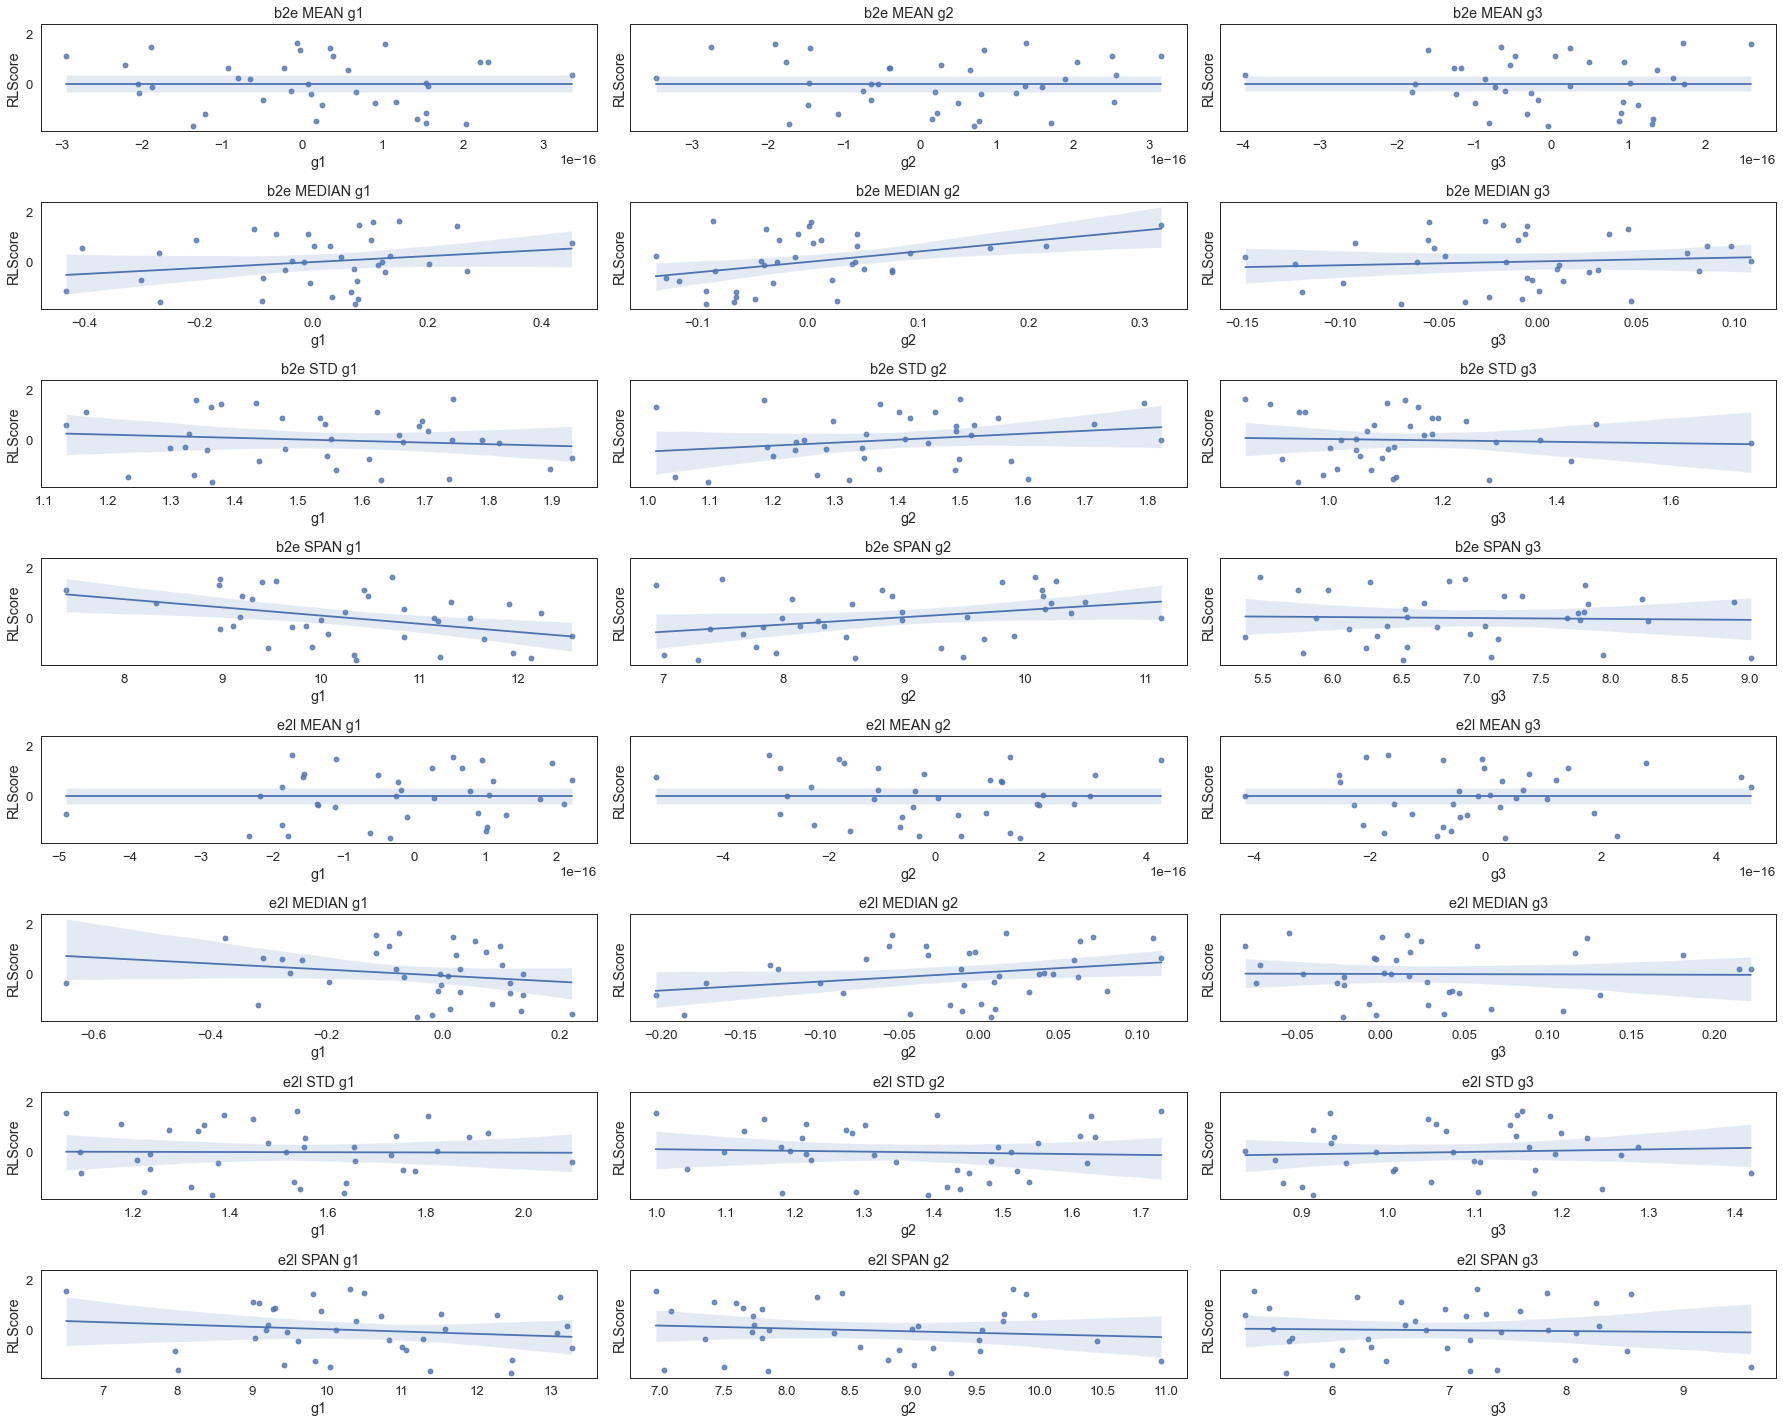

In [192]:
# correlation plot of each gradient with task score

fig, axes = plt.subplots(8,3, figsize=(25, 20), sharey=True)

for i, ax in enumerate(axes.flatten()):
    # epoch, agg_func
    epoch = 'b2e' if i < 12 else 'e2l'
    agg_func = 'mean' if i%12 < 3 else 'median' if i%12 < 6 else 'std' if i%12 < 9 else span
    agg_str = agg_func if agg_func != span else 'span'

    data = dfg.groupby(level='subject').apply(agg_func).xs(epoch, axis=1, level='epoch').join(metrics)

    g = 'g' + str(i%3 + 1)
    seaborn.regplot(x=g, y=metric, data=data, ax=ax)
    ax.set_title(epoch + ' ' + agg_str.upper() + ' ' + g)

plt.tight_layout()
# plt.savefig('g-regplot.svg')
plt.show()

# histogram of regions gradients

In [271]:
# 1. mean of regions over all subjects

In [272]:
data_regions = dfg.groupby(level=['region', '7net', '17net']).mean().reorder_levels([1,0], axis=1)
data_regions.head()

,,epoch,b2e,baseline,e2l,early,late,b2e,baseline,e2l,early,late,b2e,baseline,e2l,early,late
,,g,g1,g1,g1,g1,g1,g2,g2,g2,g2,g2,g3,g3,g3,g3,g3
region,7net,17net,,,,,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,-0.067896,-1.568083,-0.021532,-1.635978,-1.657511,0.329908,-0.292681,0.001426,0.037227,0.038653,-0.352394,-0.214814,-0.047585,-0.567208,-0.614793
7Networks_LH_Cont_Cing_2,Cont,ContC,-0.085254,0.483634,0.108654,0.398380,0.507034,0.153865,-1.805169,0.095278,-1.651304,-1.556026,-0.368419,-0.963203,0.433545,-1.331622,-0.898077
7Networks_LH_Cont_Cing_3,Cont,ContC,-0.210667,0.395936,-0.129577,0.185269,0.055692,0.134357,-1.807486,0.146790,-1.673129,-1.526339,-0.285915,-0.969640,0.565794,-1.255555,-0.689760
7Networks_LH_Cont_Cing_4,Cont,ContA,-0.095739,-1.313212,0.159583,-1.408951,-1.249368,0.016671,-0.036813,0.295080,-0.020142,0.274937,-0.447264,0.346091,0.005920,-0.101173,-0.095253
7Networks_LH_Cont_Cing_5,Cont,ContC,-0.123340,-0.084046,0.118276,-0.207385,-0.089110,-0.284834,-1.555497,0.190198,-1.840331,-1.650133,-0.304936,-0.953957,0.341026,-1.258892,-0.917866


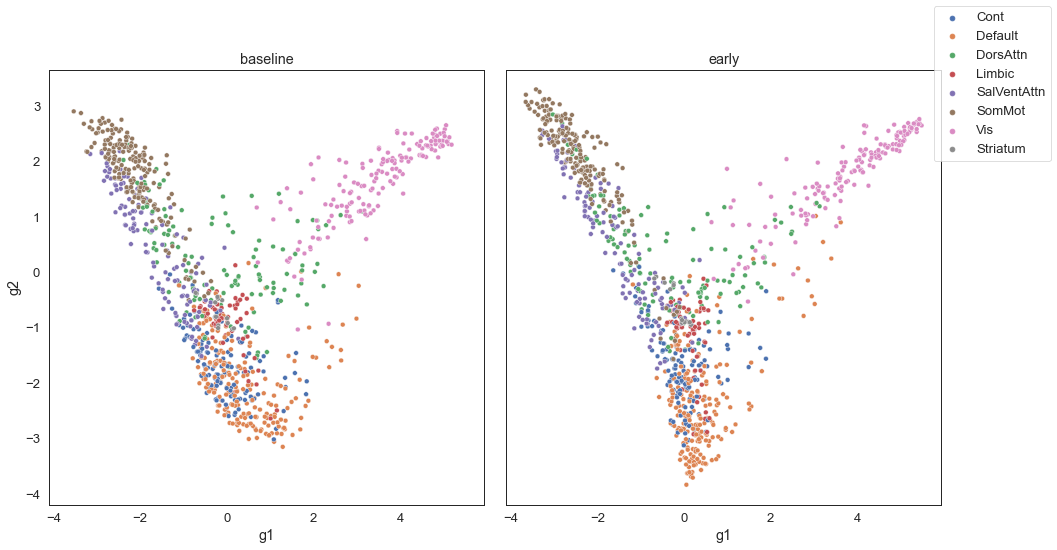

In [232]:
# plot side by side. y is g1, x is g2. share y. left 'baseline' right 'early'

fig, axes = plt.subplots(1,2, figsize=(16, 8), sharex=True, sharey=True, gridspec_kw={'wspace': 0.05})

seaborn.scatterplot(y='g2', x='g1', ax=axes[0], hue='7net',
                    data=data_regions.loc[:, 'baseline'])
axes[0].set_title('baseline')

seaborn.scatterplot(y='g2', x='g1', ax=axes[1], hue='7net',
                    data=data_regions.loc[:, 'early'])
axes[1].set_title('early')

# share legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.show()

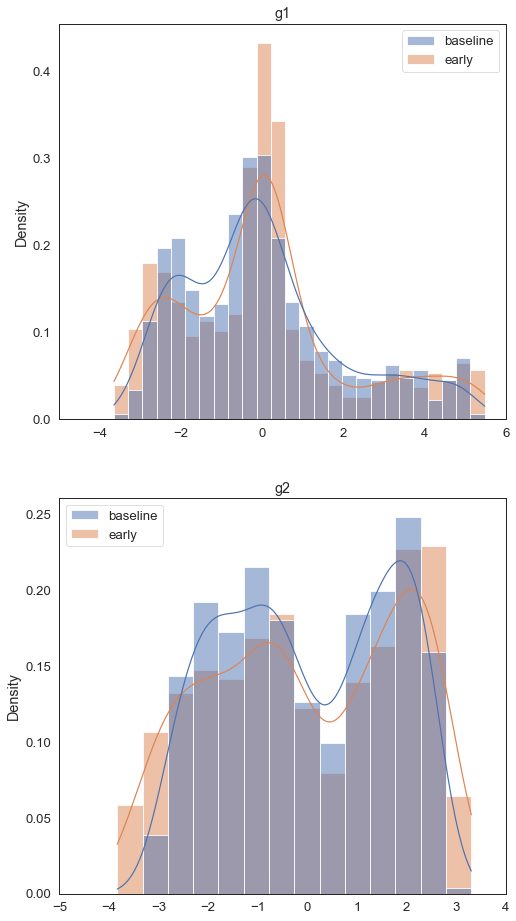

In [270]:
fig, axes = plt.subplots(2,1, figsize=(8, 16))

# range x axis
seaborn.histplot(data=data_regions.loc[:, pd.IndexSlice[['baseline', 'early'], 'g1']],
                 kde=True, stat='density', common_norm=False, ax=axes[0])
axes[0].set_xlim(-5,6)
axes[0].set_title('g1')

seaborn.histplot(data=data_regions.loc[:, pd.IndexSlice[['baseline', 'early'], 'g2']],
                 kde=True, stat='density', common_norm=False, ax=axes[1])
axes[1].set_xlim(-5,4)
axes[1].set_title('g2')
plt.show()

# plot histogram of g1
# seaborn.histplot(data=data_regions.loc[:, pd.IndexSlice[['baseline', 'early'], 'g1']],
#                  kde=True, stat='density', common_norm=False)
# plt.show()

In [ ]:
# 2. take all regions - subjects